In [1]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import urllib

from skimage.exposure import rescale_intensity
from skimage.transform import rescale, rotate
from skimage.color import rgb2gray
from skimage.feature import hog
from sklearn.metrics import mean_squared_error
from scipy.stats import wasserstein_distance
from scipy.spatial.distance import cosine
from skimage import exposure

In [34]:
# standard
import pandas as pd
import numpy as np
import random
import os

# tf and keras
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Conv1D
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling1D
from tensorflow.keras.layers import GlobalAveragePooling1D
from tensorflow.keras.layers import Embedding
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing import sequence
from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import tensorflow_datasets as tfds

from sklearn.impute import SimpleImputer
from imblearn.over_sampling import SMOTE

import keras
import keras_tuner as kt

from keras import layers, models
from keras.optimizers import Adam
from tensorflow.keras import layers, optimizers
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.models import load_model

from sklearn.ensemble import RandomForestRegressor, HistGradientBoostingRegressor
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

from sklearn.neighbors import KNeighborsClassifier
import xgboost as xgb
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree

from sklearn.metrics import confusion_matrix

import joblib

# shap
#import shap

import openpyxl

# plots and images
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import Image

# others
import re
from sklearn.decomposition import PCA

import os
import numpy as np
import pandas as pd
from PIL import Image
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical

#from wordcloud import WordCloud
from collections import Counter
import warnings
warnings.filterwarnings("ignore")

#silence TF
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'


random.seed(42)


In [35]:
def whoAmI(img):
    """
    Prints dtype, min, max, mean, height, and width of an image.
    """
    print(f"dtype     : {img.dtype}")
    print(f"min       : {np.min(img):.4f}")
    print(f"max       : {np.max(img):.4f}")
    print(f"mean      : {np.mean(img):.4f}")
    print(f"shape     : {img.shape}")
    if img.ndim == 2:
        print(f"height    : {img.shape[0]}")
        print(f"width     : {img.shape[1]}")
    elif img.ndim == 3:
        print(f"height    : {img.shape[0]}")
        print(f"width     : {img.shape[1]}")
        print(f"channels  : {img.shape[2]}")

#VS - II helpful functions

# summarizes a data frame in a printer friendly way
def summarize_dataframe(df):
    summary = pd.DataFrame({
        'Column Name': df.columns,
        'Data Type': df.dtypes.values,
        'Null Count': df.isnull().sum().values,
        'Non-Null Count': df.notnull().sum().values,
        'Unique Count': df.nunique().values
    })
    return summary

def plot_training_history(history):
    """
    Plots training and validation loss & accuracy from a Keras history object.

    Parameters:
    - history: Keras history object from model.fit()
    """

    epochs = range(1, len(history.history['loss']) + 1)

    train_loss = history.history['loss']
    val_loss = history.history['val_loss']
    train_acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']


    fig, ax = plt.subplots(1, 2, figsize=(12, 5))

    ax[0].plot(epochs, train_loss, label='Training Loss', color='blue', linestyle='-')
    ax[0].plot(epochs, val_loss, label='Validation Loss', color='red', linestyle='--')
    ax[0].set_title('Training & Validation Loss')
    ax[0].set_xlabel('Epochs')
    ax[0].set_ylabel('Loss')
    ax[0].legend()

    ax[1].plot(epochs, train_acc, label='Training Accuracy', color='blue', linestyle='-')
    ax[1].plot(epochs, val_acc, label='Validation Accuracy', color='red', linestyle='--')
    ax[1].set_title('Training & Validation Accuracy')
    ax[1].set_xlabel('Epochs')
    ax[1].set_ylabel('Accuracy')
    ax[1].legend()

    plt.tight_layout()
    plt.show()

In [4]:
data_dir = '/Users/vishalsaxena/Documents/BERKMIDS2024ROOT/09MIDSCourses/MIDS281CompVision/281_Final_Project/281_FP_Factory/dataset/skin-cancer-mnist-ham10000/'
data_dir_images = data_dir + '/HAM10000_images/'

csv_file = os.path.join(data_dir, 'HAM10000_metadata.csv')
metadata_df = pd.read_csv(csv_file)

In [5]:
metadata_df.head()

,lesion_id,image_id,dx,dx_type,age,sex,localization
0,HAM_0000118,ISIC_0027419,bkl,histo,80.0,male,scalp
1,HAM_0000118,ISIC_0025030,bkl,histo,80.0,male,scalp
2,HAM_0002730,ISIC_0026769,bkl,histo,80.0,male,scalp
3,HAM_0002730,ISIC_0025661,bkl,histo,80.0,male,scalp
4,HAM_0001466,ISIC_0031633,bkl,histo,75.0,male,ear


In [6]:
metadata_df.columns

Index(['lesion_id', 'image_id', 'dx', 'dx_type', 'age', 'sex', 'localization'], dtype='object')

In [7]:
len(metadata_df)

10015

In [8]:
#map labels
label_mapping = {
    'nv': 'Melanocytic nevi',
    'mel': 'Melanoma',
    'bkl': 'Benign keratosis-like lesions',
    'bcc': 'Basal cell carcinoma',
    'akiec': 'Actinic keratoses',
    'vasc': 'Vascular lesions',
    'df': 'Dermatofibroma'
}
metadata_df['dx_full'] = metadata_df['dx'].map(label_mapping)

In [9]:
metadata_ = metadata_df.to_numpy()

In [10]:
metadata_.shape

(10015, 8)

In [11]:
metadata_[0,:]

array(['HAM_0000118', 'ISIC_0027419', 'bkl', 'histo', 80.0, 'male',
       'scalp', 'Benign keratosis-like lesions'], dtype=object)

In [12]:
labels = np.unique(metadata_[:,7])

In [13]:
labels

array(['Actinic keratoses', 'Basal cell carcinoma',
       'Benign keratosis-like lesions', 'Dermatofibroma',
       'Melanocytic nevi', 'Melanoma', 'Vascular lesions'], dtype=object)

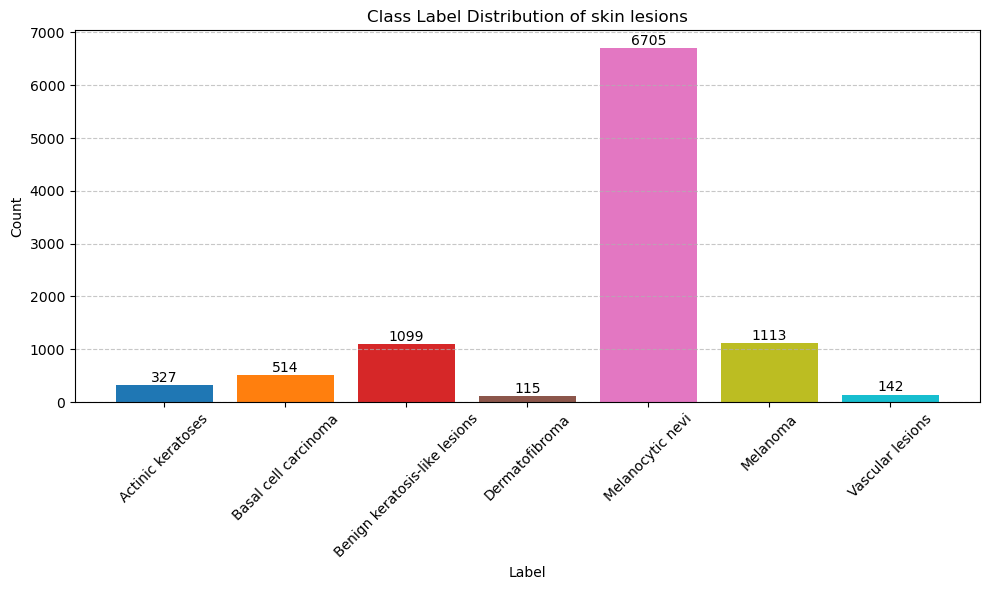

In [14]:
import numpy as np
import matplotlib.pyplot as plt

# Extract labels from column 7
labels = metadata_[:, 7]

# Get unique labels and their counts
unique_labels, counts = np.unique(labels, return_counts=True)

# Assign a different color to each bar
colors = plt.cm.tab10(np.linspace(0, 1, len(unique_labels)))  # or 'Set3', 'tab20', etc.

# Plot
plt.figure(figsize=(10, 6))
bars = plt.bar(unique_labels, counts, color=colors)

# Annotate counts on top of each bar
for bar, count in zip(bars, counts):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 5,
             str(count), ha='center', va='bottom', fontsize=10)

# Labels and title
plt.xlabel('Label')
plt.ylabel('Count')
plt.title('Class Label Distribution of skin lesions')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


    ## create a data frame of X = numpy arrays of 1D, flattened image vectors, Y = one hot encoded class labels

In [15]:
metadata_df.columns

Index(['lesion_id', 'image_id', 'dx', 'dx_type', 'age', 'sex', 'localization',
       'dx_full'],
      dtype='object')

In [16]:
metadata_df['image_id'][:3]
np.unique(metadata_df['dx'])

array(['akiec', 'bcc', 'bkl', 'df', 'mel', 'nv', 'vasc'], dtype=object)

In [17]:
class_labels = np.unique(metadata_df['dx'])


In [28]:
from PIL import Image
def load_images_with_labels(data_dir_images, metadata_df, image_size = (64,64)):
    "using image_id and dx columns (dx has class labels)"
    " returns X and Y number arrays."
    "X = flattened 1D numpy array of 64x64 sized grayscale image"
    "Y = its class label"
    X, Y = [], []
    image_size = (64, 64)

    for _, row in metadata_df.iterrows():
        file_name = row['image_id']
        label = row['dx']
        img = Image.open(os.path.join(data_dir_images, file_name + ".jpg")).convert("L").resize(image_size) # RGB image converetd to gray scale
        img_flattened_and_scaled = np.array(img).flatten() / 255.0
        X.append(img_flattened_and_scaled)
        Y.append(label)
    return np.array(X), np.array(Y)
    

In [31]:
X_raw, Y_raw = load_images_with_labels(data_dir_images,metadata_df)

In [32]:
print(f"{X_raw.shape = }, { Y_raw.shape = }")

X_raw.shape = (10015, 4096),  Y_raw.shape = (10015,)


    # Raw images, and their English labels
        X_raw numpy array shapoe (10015, 4096), 
        Y_raw numpy array shape  (10015,)

------------


In [37]:
# Encode labels to integers
le = LabelEncoder()
Y_encoded = le.fit_transform(Y_raw)

# Convert to one-hot for softmax regression
Y_onehot = to_categorical(Y_encoded)
Y_onehot.shape

(10015, 7)

In [38]:
X_train, X_test, y_train, y_test = train_test_split(
    X_raw, Y_onehot, test_size=0.2, stratify=Y_encoded, random_state=42
)

In [43]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.callbacks import EarlyStopping

input_dim = X_train.shape[1]             # 4096 for 64x64 grayscale
num_classes = y_train.shape[1]

input_layer = Input(shape=(input_dim,))
output_layer = Dense(num_classes, activation='softmax')(input_layer)
model = Model(inputs=input_layer, outputs=output_layer)

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

early_stop = EarlyStopping(
    monitor='val_loss',        # you can also monitor 'val_accuracy'
    patience=3,                # stop after 3 epochs with no improvement
    restore_best_weights=True
)
history = model.fit(
    X_train, y_train,
    epochs=50,
    batch_size=32,
    validation_split=0.2,   # ← use 20% of training data for validation
    callbacks=[early_stop]
)

Epoch 1/50
  1/201 ━━━━━━━━━━━━━━━━━━━━ 47s 238ms/step - accuracy: 0.0000e+00 - loss: 1.8544

E0000 00:00:1752544386.936326  358922 meta_optimizer.cc:967] PluggableGraphOptimizer failed: INVALID_ARGUMENT: Failed to deserialize the `graph_buf`.


201/201 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.6412 - loss: 1.3918 - val_accuracy: 0.6744 - val_loss: 1.1732
Epoch 2/50
201/201 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.6534 - loss: 1.2364 - val_accuracy: 0.6737 - val_loss: 1.0969
Epoch 3/50
201/201 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.6634 - loss: 1.1519 - val_accuracy: 0.6756 - val_loss: 1.1451
Epoch 4/50
201/201 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.6534 - loss: 1.1718 - val_accuracy: 0.6781 - val_loss: 1.0406
Epoch 5/50
201/201 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.6571 - loss: 1.1292 - val_accuracy: 0.6775 - val_loss: 1.0410
Epoch 6/50
201/201 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.6599 - loss: 1.1647 - val_accuracy: 0.6800 - val_loss: 1.1640
Epoch 7/50
201/201 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.6607 - loss: 1.1554 - val_accuracy: 0.6781 - val_loss: 1.0369
Epoch 8/50
201/201 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.6617 - loss: 1.1221 - val_accuracy: 0.5758 - val

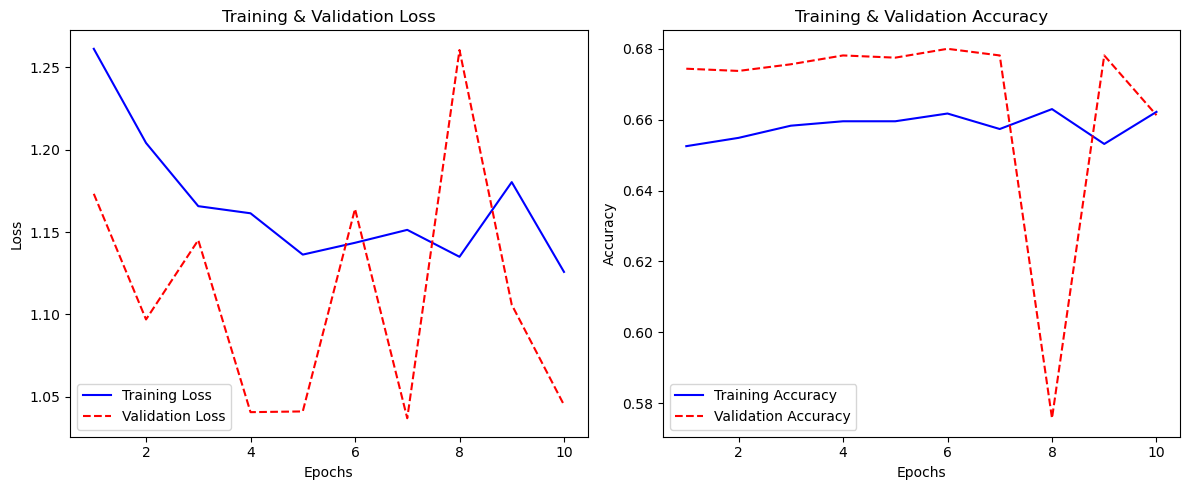

In [44]:
plot_training_history(history=history)

In [45]:
y_pred_probs = model.predict(X_test)              # shape: (n_samples, n_classes)
y_pred = np.argmax(y_pred_probs, axis=1)          # predicted class indices
y_true = np.argmax(y_test, axis=1)                # true class indices (from one-hot)


63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


E0000 00:00:1752544468.818344  358922 meta_optimizer.cc:967] PluggableGraphOptimizer failed: INVALID_ARGUMENT: Failed to deserialize the `graph_buf`.


In [49]:
from sklearn.metrics import classification_report
import pandas as pd
import numpy as np

# Generate dictionary output
report_dict = classification_report(y_true, y_pred, target_names=le.classes_, output_dict=True)

# Convert to DataFrame
report_df = pd.DataFrame(report_dict).transpose()

# Round values for readability
report_df[['precision', 'recall', 'f1-score']] = report_df[['precision', 'recall', 'f1-score']].round(2)

report_df

,precision,recall,f1-score,support
akiec,0.00,0.00,0.00,65.000000
bcc,0.00,0.00,0.00,103.000000
bkl,0.36,0.02,0.04,220.000000
df,0.13,0.09,0.11,23.000000
mel,0.43,0.09,0.14,223.000000
nv,0.69,0.99,0.81,1341.000000
vasc,0.00,0.00,0.00,28.000000
accuracy,0.67,0.67,0.67,0.673989
macro avg,0.23,0.17,0.16,2003.000000
weighted avg,0.55,0.67,0.56,2003.000000


Accuracy: 0.67 (or 67%)
This means the model predicted the correct class for 67% of the 2003 test images.


—
But Important Observations:
Metric
Value
Macro F1
0.16
Weighted F1
0.56
NV Class Recall
0.99


Interpretation:
	•	Your model is highly biased toward the 'nv' class, which is likely overrepresented in the dataset.
	•	It performs very poorly on all other classes (akiec, bcc, etc. all have 0 F1).
	•	Macro F1 = 0.16 indicates severe class imbalance and poor generalization to rare classes.

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


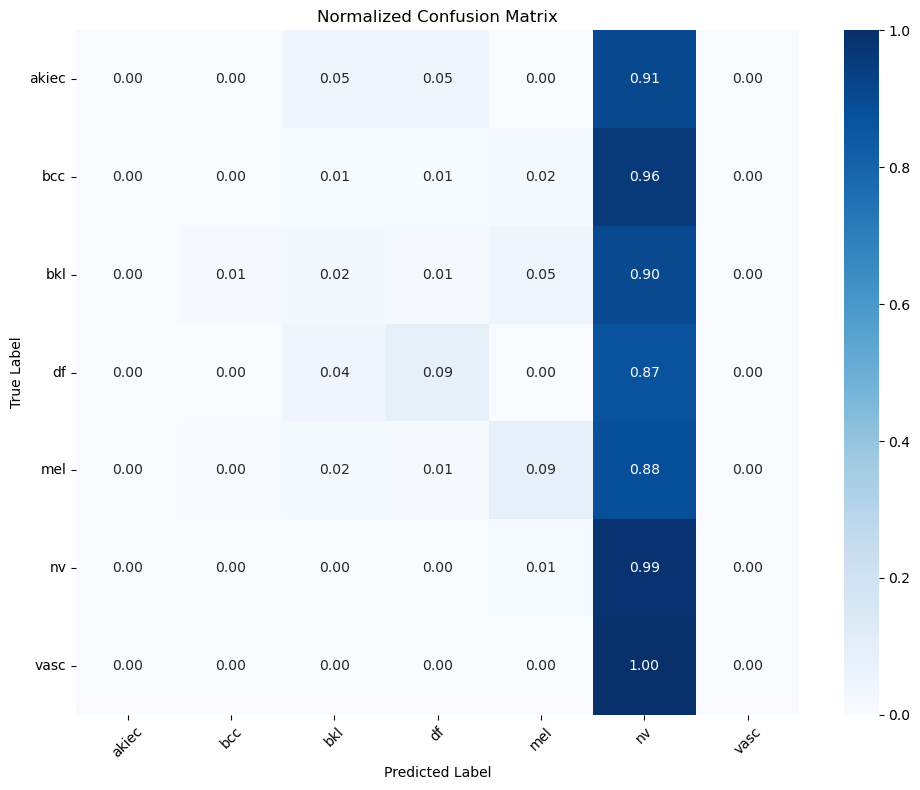

In [52]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Get true and predicted class indices
y_true = np.argmax(y_test, axis=1)
y_pred = np.argmax(model.predict(X_test), axis=1)

# Compute confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Normalize by true class counts (optional)
cm_normalized = cm.astype("float") / cm.sum(axis=1, keepdims=True)

plt.figure(figsize=(10, 8))
sns.heatmap(cm_normalized, annot=True, fmt=".2f", cmap="Blues", 
            xticklabels=le.classes_, yticklabels=le.classes_)
plt.title("Normalized Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()